In [1]:
%matplotlib inline
# the above line is literally called magic. it basically is
# it helps with plotting in the notebooks

# we're going to need all of these so lets import now
# best practice of course is to do this in the first cell
import numpy as np  # common convention, lets stick to it
import scipy.optimize as opt  # we'll need this for fitting!
from matplotlib import pyplot as plt # also the common convention

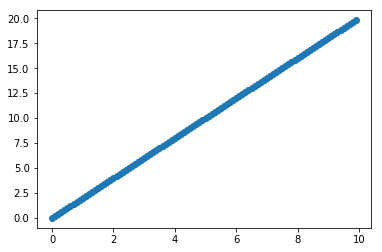

In [2]:
# start with linear data
# lets make a function that makes a line!

def line(x, m, b):
    # the order of these arguments is important later
    # and good practice
    # the x input is first because we will pass many x points  (independent variable goes first)

    return m * x + b  # as expected


x_data = np.arange(0, 10, 0.1)  # from 0 to 10 in steps of 0.1
y_data = line(x_data, 2, 0)

plt.scatter(x_data, y_data)
plt.show() #gets ride of output aka words above graph

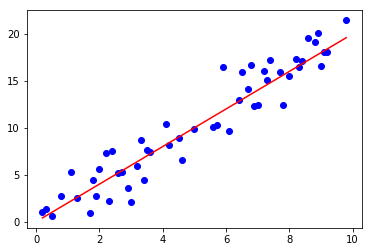

In [3]:
# boring but that's the point
# lets make something that looks like real data

x_data = np.arange(0, 10, 0.1)

# data isn't evenly spaced
# we're going to randomly choose points to keep
# we create a random array of boolean values
# then "slice" x_data; only the indices where cut is true will be kept
cut = np.random.choice(a=[False, True], size=x_data.shape)
x_data = x_data[cut]

y_data = line(x_data, 2, 0)

# cool but still a perfect line
# lets add noise

y_data_noisy = y_data + np.random.randn(len(y_data)) * 2 #*2 makes sigma 2 in standard deviation 

plt.scatter(x_data, y_data_noisy, c='b')
plt.plot(x_data, y_data, c='r')

2.0504584914151156 -0.01765716508065096
2.0504584914151156 -0.01765716508065096


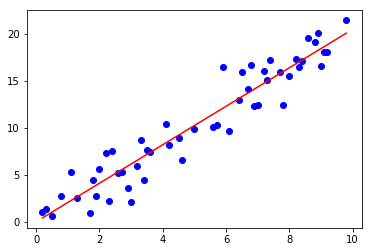

In [4]:
# now suppose we don't have y_data and know m or b, as usually happens
# that's where fitting comes in!

popt, pcov = opt.curve_fit(line, x_data, y_data_noisy)
#line is the function we defined earlier, important to define it yourself (ours is y=mx+b) 
#curve fit makes guesses

print(*popt)  # woah what's that *!?
# "Starred" expressions are very handy in python
# it means "unpack" basically. 
# *popt is short hand for popt[0], popt[1], ... , popt[n]
# in this case its just 0 and 1, but this saves lots of typing!
# of course this is equivalent to the long version, as can be seen:
print(popt[0], popt[1])    
#prints m and b (in order that they appear in function) so these are our best fit values for the line!


plt.scatter(x_data, y_data_noisy, c='b')
plt.plot(x_data, line(x_data, *popt), c='r')

In [16]:
# cool that's pretty close
# now let's try it on real data!

# we're going to use numpy's built in text file reader
# names=True means use headers
# delimiter="," is the character seperating the columns
# and many thanks to https://cdiac.ess-dive.lbl.gov/ftp/ndp030/global.1751_2011.ems
# for the data
data = np.genfromtxt("co2_emmissions.dat", names=True, delimiter=",")

# this structure is a numpy array, sometimes called a "rec array" because it has named columns
# we can see a row
print(data[0])
# we can see the names of the columns
print(data.dtype)
# and access data by column
print(data["Year"])
# and as with all arrays we can access sub-pieces
print(data["Year"][:10]) #: gives first 10 years

(1751., 3., 0., 0., 3., 0., 0., nan)
[('Year', '<f8'), ('Total', '<f8'), ('Gas', '<f8'), ('Liquids', '<f8'), ('Solids', '<f8'), ('Cement_Production', '<f8'), ('Gas_Flaring', '<f8'), ('Per_Capita', '<f8')]
[1751. 1752. 1753. 1754. 1755. 1756. 1757. 1758. 1759. 1760. 1761. 1762.
 1763. 1764. 1765. 1766. 1767. 1768. 1769. 1770. 1771. 1772. 1773. 1774.
 1775. 1776. 1777. 1778. 1779. 1780. 1781. 1782. 1783. 1784. 1785. 1786.
 1787. 1788. 1789. 1790. 1791. 1792. 1793. 1794. 1795. 1796. 1797. 1798.
 1799. 1800. 1801. 1802. 1803. 1804. 1805. 1806. 1807. 1808. 1809. 1810.
 1811. 1812. 1813. 1814. 1815. 1816. 1817. 1818. 1819. 1820. 1821. 1822.
 1823. 1824. 1825. 1826. 1827. 1828. 1829. 1830. 1831. 1832. 1833. 1834.
 1835. 1836. 1837. 1838. 1839. 1840. 1841. 1842. 1843. 1844. 1845. 1846.
 1847. 1848. 1849. 1850. 1851. 1852. 1853. 1854. 1855. 1856. 1857. 1858.
 1859. 1860. 1861. 1862. 1863. 1864. 1865. 1866. 1867. 1868. 1869. 1870.
 1871. 1872. 1873. 1874. 1875. 1876. 1877. 1878. 1879. 1880. 1881

Text(0, 0.5, 'CO$_2$ (Mega-tons)')

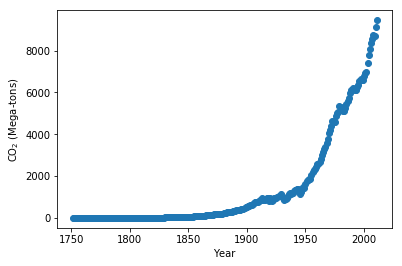

In [17]:
# cool lets see some trends!

plt.scatter(data["Year"], data["Total"])
plt.xlabel("Year")
plt.ylabel("CO$_2$ (Mega-tons)")

In [18]:
def exponential(x, a, b, c, d):
    return (a*np.exp(x * b + c)) + d

3.0253821917745054e-15 0.024146677408692307 -5.950386360054025 -118.29992497205536


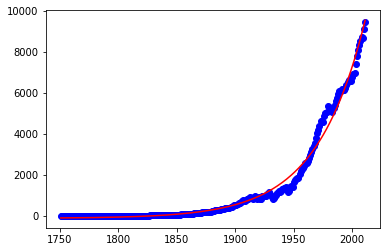

In [20]:
# Ignoring how terrifying that is...
# your assignment is to fit a trend to that data
# you may want to try multiple functions, e.g. exponential and polynomial
#define function - physics implication, x data = Year, y data = total

popt, pcov = opt.curve_fit(exponential, data["Year"], data["Total"], p0=[1e-5, 0.01 , 0.8, 0.1])
print(*popt)
x=data["Year"]
y=data["Total"]
plt.scatter(x, y, c='b')
plt.plot(x, exponential(x,*popt), c='r')

In [ ]:
popt, pcov = opt.curve_fit(exponential, data["Year"], data["Total"], p0=[])
print(*popt)

In [ ]:
# plt.scatter(data["Year"], data["Total"])
plt.plot(data["Year"], exponential(data["Year"], *popt), c='r')